In [2]:
%load_ext autoreload
%autoreload 2
from analysis_lib import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Prosite vs csearch vs IBF vs HIBF

In [3]:
sprot_df = pd.read_csv("/Users/rschwab/repos/tetrex_analysis/data/RESULTS/all_sprot_times.tsv", sep="\t")

In [4]:
sprot_df

,NAME,ID,PATTERN,GROUP_COUNT,REGEX,PROSITE,CSEARCH,TETREX_IBF,TETREX,EGREP,BIN_COUNT,CSEARCH_BINS,TETREX_BINS,CSEARCH_FP,TETREX_FP,RIPGREP
0,ANTENNAPEDIA,PS00032,[LIVMFE]-[FY]-P-W-M-[KRQTA],5,(L|I|V|M|F|E)(F|Y)PWM(K|R|Q|T|A),10.686,0.208119,0.009352,0.074809,14.592,7,479,561,472,554,0.132
1,ENGRAILED,PS00033,L-M-A-[EQ]-G-L-Y-N,7,LMA(E|Q)GLYN,10.512,0.430810,0.001576,0.001713,3.324,3,991,3,988,0,0.373
2,DNA_MISMATCH_REPAIR_1,PS00058,G-F-R-G-E-[AG]-L,6,GFRGE(A|G)L,10.902,0.430812,0.028046,0.003708,2.959,7,991,8,984,1,0.152
3,L_LDH,PS00064,[LIVMA]-G-[EQ]-H-G-[DN]-[ST],6,(L|I|V|M|A)G(E|Q)HG(D|N)(S|T),10.712,0.430432,0.006144,0.002450,11.240,3,993,10,990,7,0.128
4,G6P_DEHYDROGENASE,PS00069,D-H-[YF]-L-G-K-[EQK],6,DH(Y|F)LGK(E|Q|K),9.343,0.421385,0.002936,0.001794,2.271,1,959,4,958,3,0.291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,COE,PS01345,C-S-R-C-C-[DE]-[KR]-K-S-C,9,CSRCC(D|E)(K|R)KSC,9.409,0.291799,0.004174,0.001186,1.982,3,623,3,620,0,0.110
112,NODA,PS01349,[RHQ]-[ST]-W-[GSA]-G-A-R-P-E,8,(R|H|Q)(S|T)W(G|S|A)GARPE,10.440,0.441299,0.001652,0.001152,7.759,1,959,1,958,0,0.124
113,PHOSPHOKETOLASE_1,PS60002,E-G-G-E-L-G-Y,6,EGGELGY,9.395,0.475324,0.004374,0.001588,2.624,4,1003,4,999,0,0.106
114,CYCLOTIDE_MOEBIUS,PS60009,C-[GA]-E-[ST]-C-[FTV]-[GLTI]-G-[TSK]-C,9,C(G|A)E(S|T)C(F|T|V)(G|L|T|I)G(T|S|K)C,9.621,0.468257,0.006375,0.004876,3.115,10,1013,10,1003,0,0.185


## Speed Up Calculations for Amino Acids

In [ ]:
sprot_df['PROSITE'].mean()/sprot_df['TETREX'].mean()

246.32060820384768

In [ ]:
sprot_df['EGREP'].mean()/sprot_df['TETREX'].mean()

239.17198073285357

In [ ]:
sprot_df['CSEARCH'].mean()/sprot_df['TETREX'].mean()

10.333761529023743

In [ ]:
sprot_df['RIPGREP'].mean()/sprot_df['TETREX'].mean()

6.934944544093992

## Runtime Plots

In [6]:
sprot_melt = pd.melt(sprot_df, id_vars=["ID"], value_vars=["PROSITE","EGREP","CSEARCH", "RIPGREP", "TETREX"])
sprot_melt.columns = ["RegEx ID", "Tool", "Runtime (s)"]

In [17]:
sprot_melt["GB/s"] = 1/sprot_melt["Runtime (s)"]

In [21]:
sprot_melt.groupby("Tool")['GB/s'].apply(stats.hmean)

Tool
CSEARCH     2.328800
EGREP       0.100619
PROSITE     0.097699
RIPGREP     3.470145
TETREX     24.065262
Name: GB/s, dtype: float64

# Bin Analysis (For Real This Time)

Text(0, 0.5, 'Bin Count')

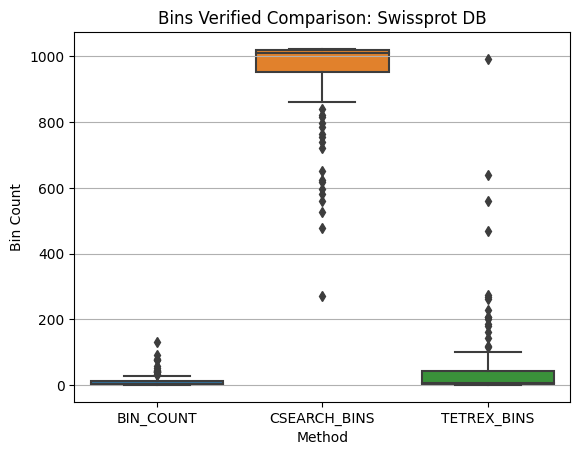

In [8]:
fig, axes = plt.subplots()
sns.boxplot(data=sprot_df[['BIN_COUNT','CSEARCH_BINS','TETREX_BINS']], ax = axes)
axes.set_title('Bins Verified Comparison: Swissprot DB')

axes.yaxis.grid(True)
axes.set_xlabel('Method')
axes.set_ylabel('Bin Count')

In [10]:
sprot_df['CSEARCH_REDUCTION'] = pd.Series([((1024-pred)/1024)*100 for pred in sprot_df['CSEARCH_BINS']])
sprot_df['TETREX_REDUCTION'] = pd.Series([((1024-pred)/1024)*100 for pred in sprot_df['TETREX_BINS']])

<bound method Figure.get_figwidth of <Figure size 640x480 with 1 Axes>>

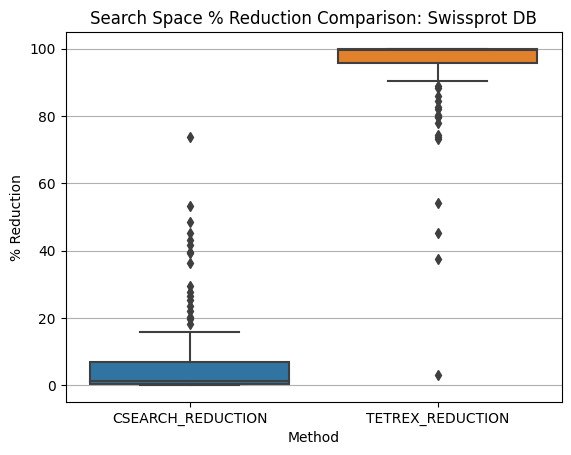

In [11]:
fig, axes = plt.subplots()
sns.boxplot(data=sprot_df[['CSEARCH_REDUCTION','TETREX_REDUCTION']], ax = axes)
axes.set_title('Search Space % Reduction Comparison: Swissprot DB')

axes.yaxis.grid(True)
axes.set_xlabel('Method')
axes.set_ylabel('% Reduction')
fig.get_figwidth

In [14]:
sprot_df['CSEARCH FRACTION'] = pd.Series([((pred)/1024)*100 for pred in sprot_df['CSEARCH_BINS']])
sprot_df['TETREX FRACTION'] = pd.Series([((pred)/1024)*100 for pred in sprot_df['TETREX_BINS']])

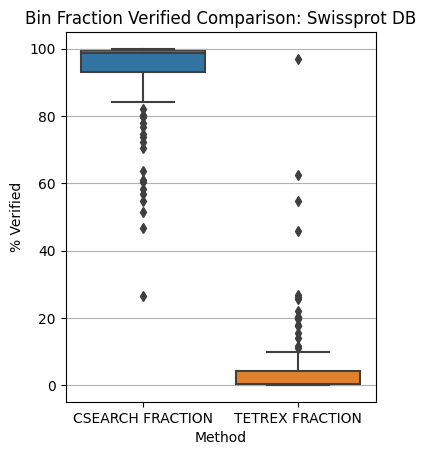

In [16]:
fig, axes = plt.subplots()
sns.boxplot(data=sprot_df[['CSEARCH FRACTION','TETREX FRACTION']], ax = axes)
axes.set_title('Bin Fraction Verified Comparison: Swissprot DB')

axes.yaxis.grid(True)
axes.set_xlabel('Method')
axes.set_ylabel('% Verified')
fig.set_figwidth(4)

[(0.0, 100.0)]

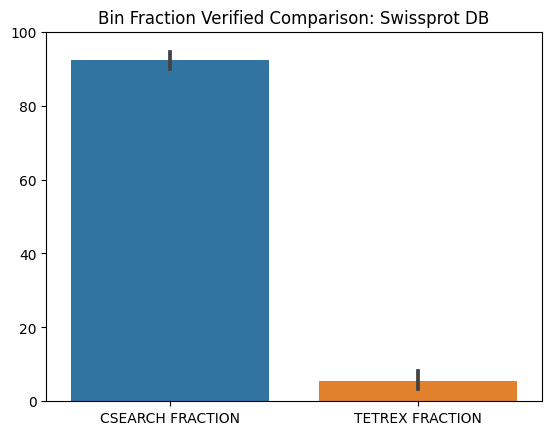

In [ ]:
fig, axes = plt.subplots()
sns.barplot(data=sprot_df[['CSEARCH FRACTION','TETREX FRACTION']])
axes.set_title('Average Bin Fraction Verified Comparison: Swissprot DB')
axes.set(ylim=(0, 100))
# axes.yaxis.grid(True)